In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("/content/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   661 non-null    float64
 1   title        1026 non-null   object 
 2   platform     1026 non-null   object 
 3   date         1026 non-null   object 
 4   user_score   777 non-null    float64
 5   link         1026 non-null   object 
 6   esrb_rating  910 non-null    object 
 7   developers   1014 non-null   object 
 8   genres       1017 non-null   object 
dtypes: float64(2), object(7)
memory usage: 72.3+ KB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'meta_score'),
  Text(1, 0, 'title'),
  Text(2, 0, 'platform'),
  Text(3, 0, 'date'),
  Text(4, 0, 'user_score'),
  Text(5, 0, 'link'),
  Text(6, 0, 'esrb_rating'),
  Text(7, 0, 'developers'),
  Text(8, 0, 'genres')])

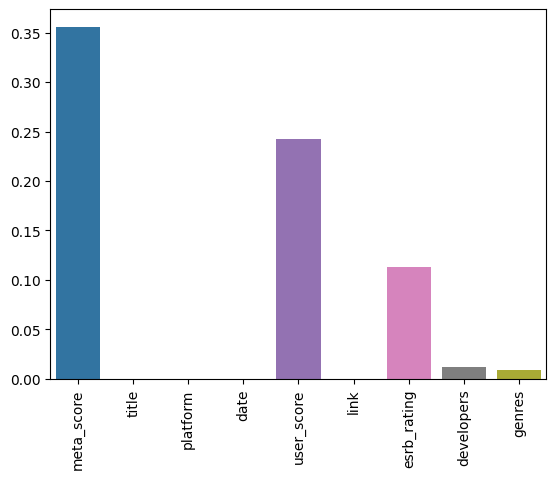

In [4]:
df.isna().sum()/df.shape[0] #Proportion of Na in the columns
sns.barplot(x = df.columns, y = df.isna().sum()/df.shape[0])
plt.xticks (rotation = 90)

In [5]:
df['title'].nunique()/df.shape[0]

0.956140350877193

In [6]:
df[(df.title.duplicated() == True)].sort_values(by = 'title')

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
562,87.0,America's Test Kitchen: Let's Get Cooking,DS,"Mar 28, 2010",6.3,/game/ds/americas-test-kitchen-lets-get-cooking,E,['indieszero'],"['Miscellaneous', 'General', 'General']"
1013,NaN,Art Academy,WIIU,TBA,NaN,/game/wii-u/art-academy,NaN,['Headstrong Games'],"['Miscellaneous', 'Edutainment']"
1011,NaN,Art Academy: Lessons for Everyone,WIIU,TBA,NaN,/game/wii-u/art-academy-lessons-for-everyone,NaN,"['Nintendo', ' Headstrong Games']","['Miscellaneous', 'Edutainment', 'Edutainment']"
440,NaN,Art Academy: Lessons for Everyone,3DS,"Oct 1, 2012",NaN,/game/3ds/art-academy-lessons-for-everyone,E,"['Nintendo', ' Headstrong Games']","['Miscellaneous', 'Edutainment', 'Edutainment']"
309,86.0,Bayonetta,WIIU,"Oct 24, 2014",8.8,/game/wii-u/bayonetta,M,['Bee Tribe'],"['Action', 'Fantasy', ""Beat-'Em-Up"", 'Action A..."
311,NaN,Bayonetta + Bayonetta 2,WIIU,"Oct 24, 2014",8.0,/game/wii-u/bayonetta-+-bayonetta-2,M,['PlatinumGames'],"['Miscellaneous', 'Compilation']"
315,91.0,Bayonetta 2,WIIU,"Sep 20, 2014",8.9,/game/wii-u/bayonetta-2,M,['PlatinumGames'],"['Action Adventure', 'Fantasy', 'Fantasy', 'Li..."
100,79.0,Captain Toad: Treasure Tracker,3DS,"Jul 13, 2018",6.9,/game/3ds/captain-toad-treasure-tracker,E,"['Nintendo EAD Tokyo ', ' Nintendo Software Te...","['Action', 'Platformer', '3D']"
299,81.0,Captain Toad: Treasure Tracker,WIIU,"Dec 5, 2014",8.6,/game/wii-u/captain-toad-treasure-tracker,E,['Nintendo EAD Tokyo '],"['Action', 'Platformer', '3D']"
939,78.0,Donkey Kong Country,GBA,"Jun 9, 2003",8.8,/game/game-boy-advance/donkey-kong-country,E,['Rare Ltd.'],"['Action', 'Platformer', '2D']"


In [7]:
def look4packages (title_list) :
    return '+' in title_list

df[df.title.apply(look4packages)]

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario 3D World + Bowser's Fury,Switch,"Feb 12, 2021",NaN,/game/switch/super-mario-3d-world-+-bowsers-fury,NaN,['Nintendo'],"['Action', 'Platformer', '3D']"
5,NaN,Pokemon Sword + Pokemon Sword Expansion Pass,Switch,"Nov 6, 2020",6.7,/game/switch/pokemon-sword-+-pokemon-sword-exp...,E,['Game Freak'],"['Role-Playing', 'Trainer']"
6,NaN,Pokemon Shield + Pokemon Shield Expansion Pass,Switch,"Nov 6, 2020",6.6,/game/switch/pokemon-shield-+-pokemon-shield-e...,E,['Game Freak'],"['Role-Playing', 'Trainer']"
13,NaN,Mario Kart 8 Deluxe + Super Mario Party,Switch,"Oct 4, 2020",NaN,/game/switch/mario-kart-8-deluxe-+-super-mario...,E,['Nintendo'],"['Miscellaneous', 'Compilation']"
68,81.0,BoxBoy! + BoxGirl!,Switch,"Apr 26, 2019",7.9,/game/switch/boxboy!-+-boxgirl!,E,['HAL Labs'],"['Puzzle', 'Action']"
79,84.0,Mario & Luigi: Bowser's Inside Story + Bowser ...,3DS,"Jan 11, 2019",7.8,/game/3ds/mario-luigi-bowsers-inside-story-+-b...,E,"['Nintendo', ' Alphadream Corporation']","['Role-Playing', 'Japanese-Style']"
122,90.0,Bayonetta + Bayonetta 2,Switch,"Feb 16, 2018",8.7,/game/switch/bayonetta-+-bayonetta-2,M,['PlatinumGames'],"['Miscellaneous', 'Compilation']"
142,77.0,Ittle Dew 2+,Switch,"Nov 14, 2017",7.7,/game/switch/ittle-dew-2+,E10+,['Ludosity Interactive'],"['Role-Playing', 'Action Adventure', 'General'..."
149,81.0,Mario & Luigi: Superstar Saga + Bowser's Minions,3DS,"Oct 6, 2017",8.2,/game/3ds/mario-luigi-superstar-saga-+-bowsers...,E,['Alphadream Corporation'],"['Role-Playing', 'Japanese-Style']"
279,73.0,Puzzle & Dragons Z + Puzzle & Dragons: Super M...,3DS,"May 22, 2015",7.6,/game/3ds/puzzle-dragons-z-+-puzzle-dragons-su...,E,['GungHo'],"['Miscellaneous', 'Compilation']"


In [8]:
df[(df['meta_score'].isna())]

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario 3D World + Bowser's Fury,Switch,"Feb 12, 2021",NaN,/game/switch/super-mario-3d-world-+-bowsers-fury,NaN,['Nintendo'],"['Action', 'Platformer', '3D']"
1,NaN,Super Smash Bros. Ultimate: Sephiroth,Switch,"Dec 22, 2020",NaN,/game/switch/super-smash-bros-ultimate-sephiroth,NaN,['Nintendo'],"['Action', '2D', 'Fighting']"
5,NaN,Pokemon Sword + Pokemon Sword Expansion Pass,Switch,"Nov 6, 2020",6.7,/game/switch/pokemon-sword-+-pokemon-sword-exp...,E,['Game Freak'],"['Role-Playing', 'Trainer']"
6,NaN,Pokemon Shield + Pokemon Shield Expansion Pass,Switch,"Nov 6, 2020",6.6,/game/switch/pokemon-shield-+-pokemon-shield-e...,E,['Game Freak'],"['Role-Playing', 'Trainer']"
9,NaN,Cadence of Hyrule: Crypt of the NecroDancer Fe...,Switch,"Oct 23, 2020",NaN,/game/switch/cadence-of-hyrule-crypt-of-the-ne...,E,['Brace Yourself Games'],"['Action', 'Rhythm', 'Music']"
...,...,...,...,...,...,...,...,...,...
1021,NaN,Bayonetta 3,Switch,TBA,NaN,/game/switch/bayonetta-3,NaN,['PlatinumGames'],"['Action Adventure', 'Linear']"
1022,NaN,The Legend of Zelda: Breath of the Wild Sequel,Switch,TBA,NaN,/game/switch/the-legend-of-zelda-breath-of-the...,NaN,['Nintendo'],"['Action Adventure', 'Open-World']"
1023,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1024,NaN,Pokemon Sleep,iOS,TBA,NaN,/game/ios/pokemon-sleep,NaN,"['The Pokemon Company', ' Select Button']","['Role-Playing', 'Miscellaneous', 'Application..."


In [9]:
df[(df['user_score'].isna())]

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario 3D World + Bowser's Fury,Switch,"Feb 12, 2021",NaN,/game/switch/super-mario-3d-world-+-bowsers-fury,NaN,['Nintendo'],"['Action', 'Platformer', '3D']"
1,NaN,Super Smash Bros. Ultimate: Sephiroth,Switch,"Dec 22, 2020",NaN,/game/switch/super-smash-bros-ultimate-sephiroth,NaN,['Nintendo'],"['Action', '2D', 'Fighting']"
9,NaN,Cadence of Hyrule: Crypt of the NecroDancer Fe...,Switch,"Oct 23, 2020",NaN,/game/switch/cadence-of-hyrule-crypt-of-the-ne...,E,['Brace Yourself Games'],"['Action', 'Rhythm', 'Music']"
13,NaN,Mario Kart 8 Deluxe + Super Mario Party,Switch,"Oct 4, 2020",NaN,/game/switch/mario-kart-8-deluxe-+-super-mario...,E,['Nintendo'],"['Miscellaneous', 'Compilation']"
15,NaN,Cadence of Hyrule: Crypt of the NecroDancer Fe...,Switch,"Sep 23, 2020",NaN,/game/switch/cadence-of-hyrule-crypt-of-the-ne...,E,['Brace Yourself Games'],"['Action', 'Rhythm', 'Music']"
...,...,...,...,...,...,...,...,...,...
1021,NaN,Bayonetta 3,Switch,TBA,NaN,/game/switch/bayonetta-3,NaN,['PlatinumGames'],"['Action Adventure', 'Linear']"
1022,NaN,The Legend of Zelda: Breath of the Wild Sequel,Switch,TBA,NaN,/game/switch/the-legend-of-zelda-breath-of-the...,NaN,['Nintendo'],"['Action Adventure', 'Open-World']"
1023,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1024,NaN,Pokemon Sleep,iOS,TBA,NaN,/game/ios/pokemon-sleep,NaN,"['The Pokemon Company', ' Select Button']","['Role-Playing', 'Miscellaneous', 'Application..."


In [12]:
df['genres'] = list(df['genres'])

In [14]:
df['first_item'] = df['genres'].str.strip('[]').str.split(',').str[0].str.strip()
df['year'] = df['date'].str.split(',').str[1].str.strip()
df.head(20)

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres,first_item,year
0,NaN,Super Mario 3D World + Bowser's Fury,Switch,"Feb 12, 2021",NaN,/game/switch/super-mario-3d-world-+-bowsers-fury,NaN,['Nintendo'],"['Action', 'Platformer', '3D']",'Action',2021
1,NaN,Super Smash Bros. Ultimate: Sephiroth,Switch,"Dec 22, 2020",NaN,/game/switch/super-smash-bros-ultimate-sephiroth,NaN,['Nintendo'],"['Action', '2D', 'Fighting']",'Action',2020
2,66.0,Fitness Boxing 2: Rhythm & Exercise,Switch,"Dec 4, 2020",6.2,/game/switch/fitness-boxing-2-rhythm-exercise,E,"['Nintendo', ' Imagineer Co.', 'Ltd.']","['Miscellaneous', 'Exercise / Fitness']",'Miscellaneous',2020
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,Switch,"Dec 4, 2020",7.6,/game/switch/fire-emblem-shadow-dragon-the-bla...,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']",'Strategy',2020
4,79.0,Hyrule Warriors: Age of Calamity,Switch,"Nov 20, 2020",8.1,/game/switch/hyrule-warriors-age-of-calamity,T,"['Omega Force', ' Koei Tecmo Games']","['Action', ""Beat-'Em-Up"", '3D']",'Action',2020
5,NaN,Pokemon Sword + Pokemon Sword Expansion Pass,Switch,"Nov 6, 2020",6.7,/game/switch/pokemon-sword-+-pokemon-sword-exp...,E,['Game Freak'],"['Role-Playing', 'Trainer']",'Role-Playing',2020
6,NaN,Pokemon Shield + Pokemon Shield Expansion Pass,Switch,"Nov 6, 2020",6.6,/game/switch/pokemon-shield-+-pokemon-shield-e...,E,['Game Freak'],"['Role-Playing', 'Trainer']",'Role-Playing',2020
7,85.0,Pikmin 3 Deluxe,Switch,"Oct 30, 2020",8.4,/game/switch/pikmin-3-deluxe,E10+,"['Eighting', ' Nintendo']","['Strategy', 'Real-Time', 'General']",'Strategy',2020
8,79.0,Part Time UFO,Switch,"Oct 28, 2020",7.3,/game/switch/part-time-ufo,E10+,['HAL Labs'],"['Action', 'Arcade']",'Action',2020
9,NaN,Cadence of Hyrule: Crypt of the NecroDancer Fe...,Switch,"Oct 23, 2020",NaN,/game/switch/cadence-of-hyrule-crypt-of-the-ne...,E,['Brace Yourself Games'],"['Action', 'Rhythm', 'Music']",'Action',2020


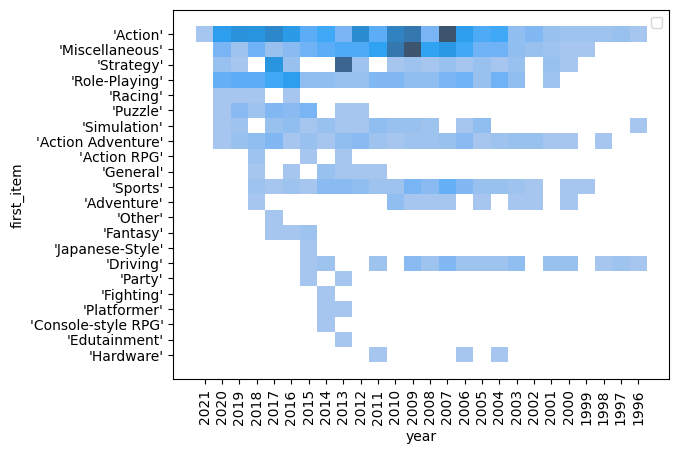

In [19]:
fig, ax = plt.subplots()
#tempo_df = df['first_item'].groupby(by = 'year').value_counts().sort_values(ascending=False)
sns.histplot(df, x='year', y='first_item', legend = True)#, hue=None
plt.legend()
plt.xticks(rotation=90)
plt.show()